# Assignment2_Ensemble_투빅스 14기 이혜린

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

## Data Load  
  
출처 : kaggle (https://www.kaggle.com/danimal/heartdiseaseensembleclassifier)

In [16]:
heart = pd.read_csv('Heart_Disease_Data.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [17]:
heart.shape

(303, 14)

### Data Explanation  
  
Var | Explanation
:-:|:-
age | age
sex | 1 = male; 0 = female
cp | chest pain type
trestbps | resting blood pressure (in mm Hg on admission to the hospital)
chol | serum cholestoral in mg/dl
fbs | fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restech | resting electrocardiographic results
thalach | maximum heart rate achieved
exang | exercise induced angina (1 = yes; 0 = no)
oldpeak | ST depression induced by exercise relative to rest
slop | the slope of the peak exercise ST segment
ca | number of major vessels (0-3) colored by flourosopy 
thal | 3 = normal; 6 = fixed defect; 7 = reversable defect
pred_attribute | the predicted attribute; diagnosis of heart disease ; binary한 후(1이상이면 위험. 0이면 위험X) **target**변수로 사용

In [18]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trestbps        303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slop            303 non-null    int64  
 11  ca              303 non-null    object 
 12  thal            303 non-null    object 
 13  pred_attribute  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


범주형 변수는 one hot encoding이 필요해 보인다.

In [19]:
heart.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
dtype: int64

In [20]:
heart['ca'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [21]:
heart[heart['ca']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [22]:
heart['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [23]:
heart[heart['thal']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2


결측치가 없다고 나왔으나, 자세히 살펴보니 ?값을 가진 데이터가 있음을 알 수 있다. 데이터 개수가 몇개 되지 않으므로 삭제한다.

In [24]:
heart = heart[heart['ca']!='?']
heart = heart[heart['thal']!='?']

heart.shape

(297, 14)

## Target Variable

In [25]:
heart['pred_attribute'].value_counts()

0    160
1     54
3     35
2     35
4     13
Name: pred_attribute, dtype: int64

숫자가 클수록 심장병에 걸릴 확률이 높다는 뜻. 이 변수를 심장병 위험이 있으면 1, 없으면 0인 이진변수로 만든 후 target변수로 사용한다.

In [26]:
heart['pred_attribute'].replace(inplace=True, value=[1,1,1,1], to_replace=[1,2,3,4])

In [27]:
heart['pred_attribute'].value_counts()

0    160
1    137
Name: pred_attribute, dtype: int64

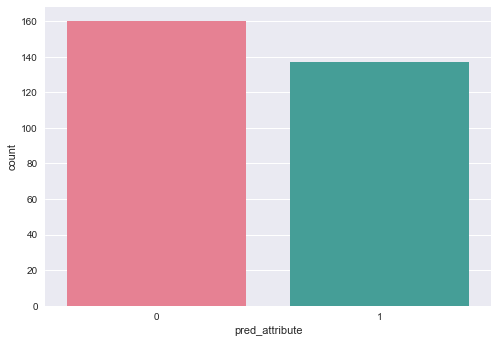

In [28]:
sns.countplot(heart['pred_attribute'], palette='husl')

어느 정도 balanced한 데이터이다.

## Data EDA

### All Variables

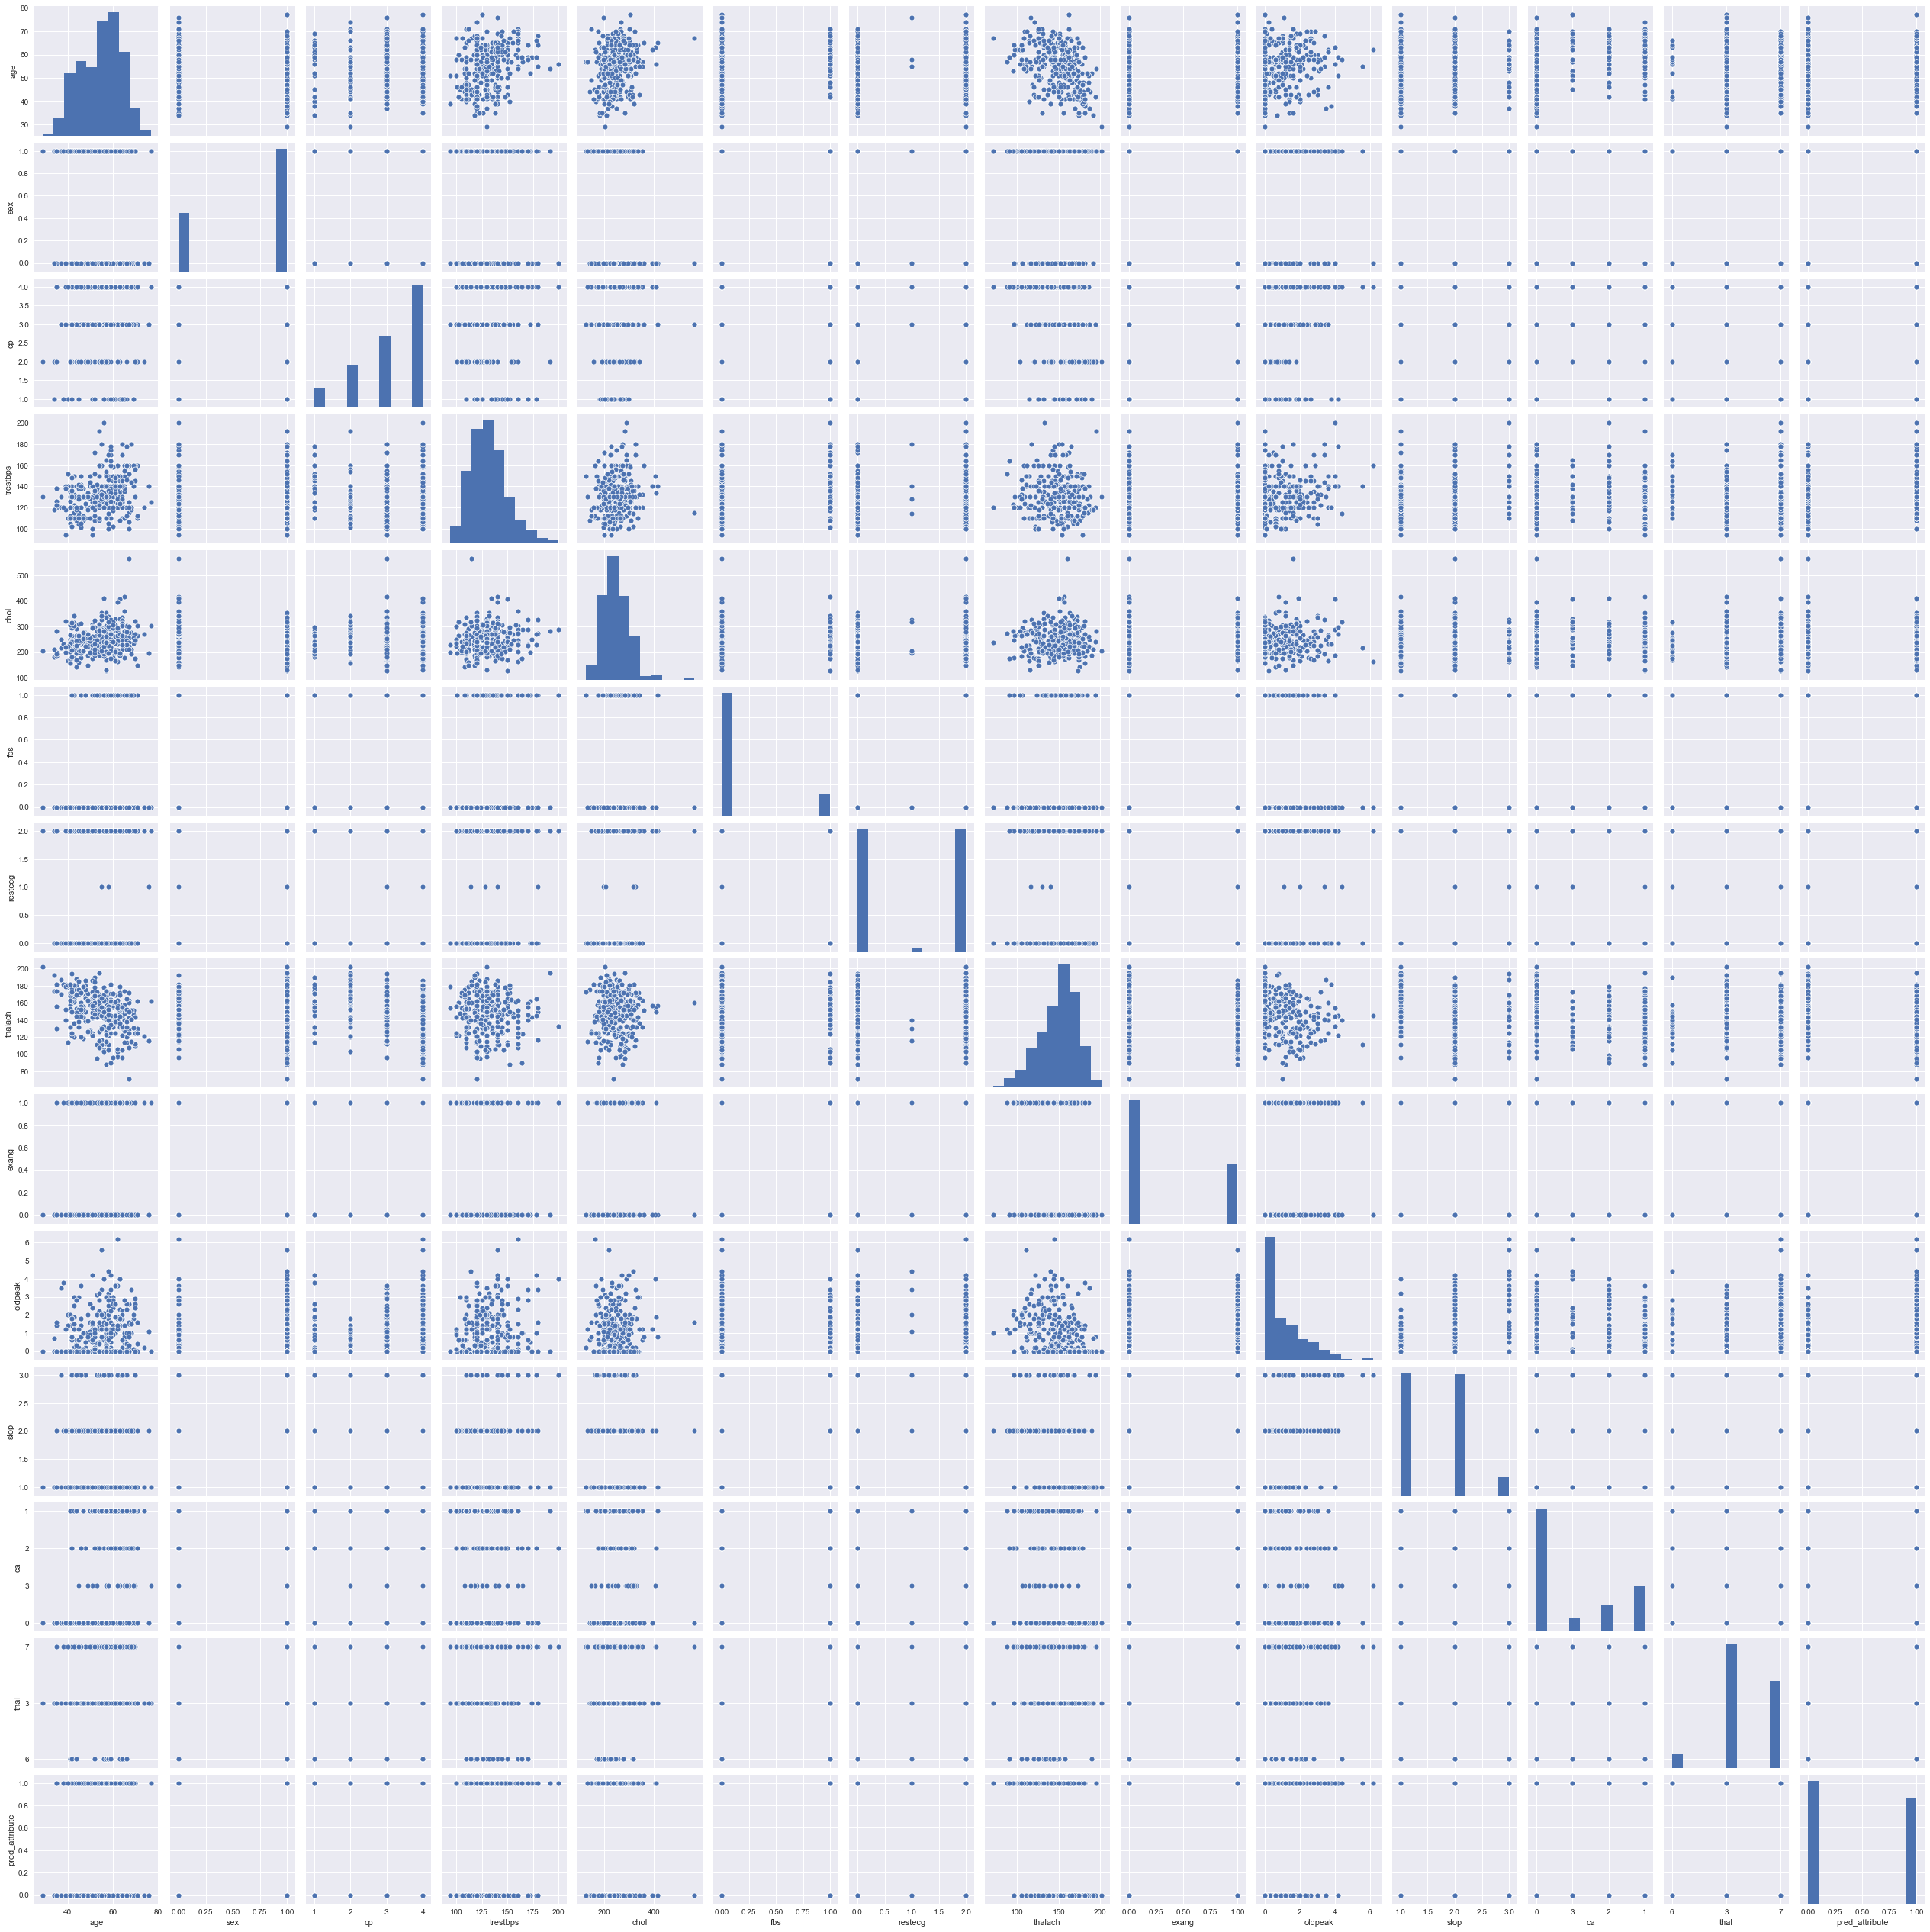

In [29]:
sns.pairplot(heart, palette='husl')

전체 변수를 모두 살펴보면 데이터를 파악하기가 힘드므로 연속형 변수 위주로 먼저 본다.

### Continuous Variables

In [30]:
# EDA 시각화를 위한 dataset 생성 

features_continuous=['age',"trestbps", "chol", "thalach", "oldpeak"]
heart_continuous = heart[features_continuous]
heart_continuous['pred'] = pd.get_dummies(heart['pred_attribute'], drop_first=True)
heart_continuous.head()

,age,trestbps,chol,thalach,oldpeak,pred
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,1
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0


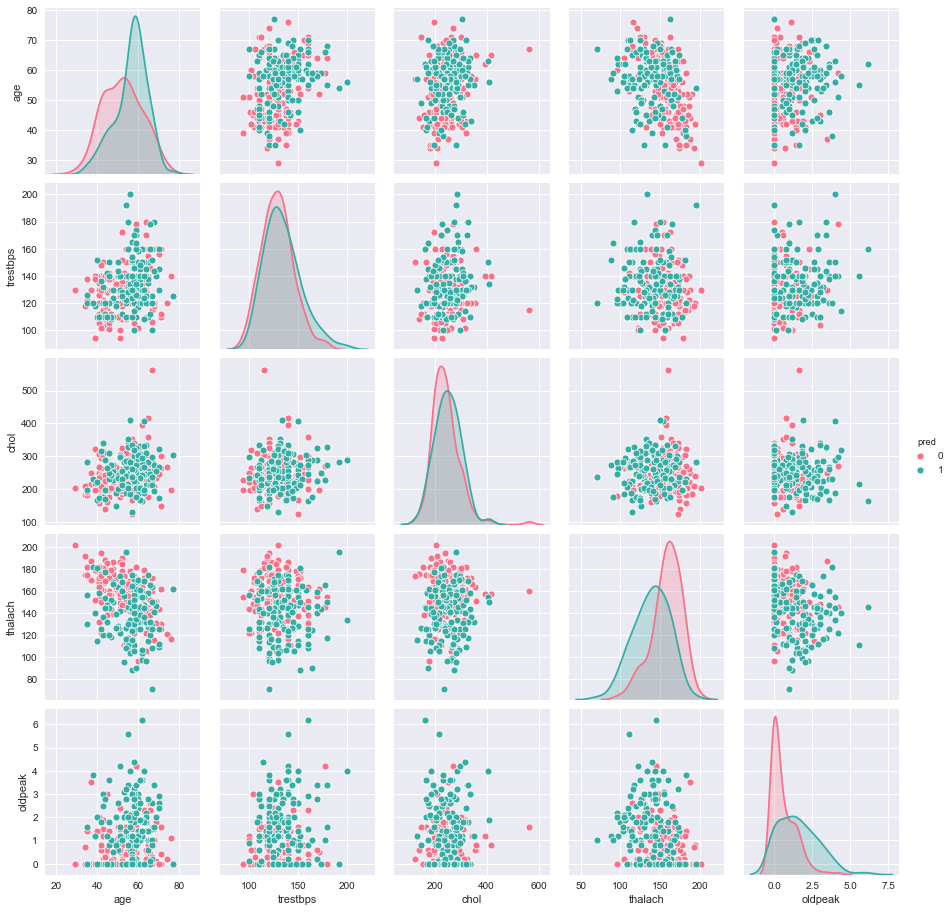

In [31]:
sns.pairplot(heart_continuous, palette='husl', hue='pred')

target 변수별로 pairplot을 그려보았으나 그룹별로 눈에 띄게 다른 점은 발견하지 못했다.  
그러나 `chol` 변수와 `oldpeak` 변수에 이상치가 있어보이므로 확인해본다.

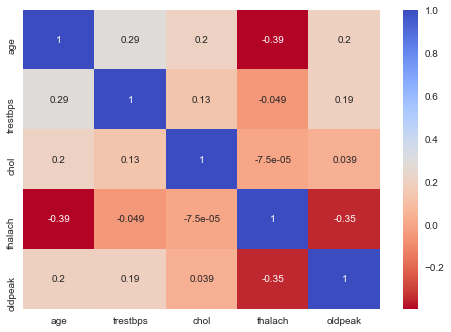

In [32]:
sns.heatmap(heart[features_continuous].corr(), annot=True, cmap='coolwarm_r')

`chol`과 `thalach` 를 제외한 나머지 변수들 간에는 어느정도 상관관계가 있음을 볼 수 있다.

## Data Preprocessing

### Outlier

Text(0.5, 1.0, 'Distribution of chol')

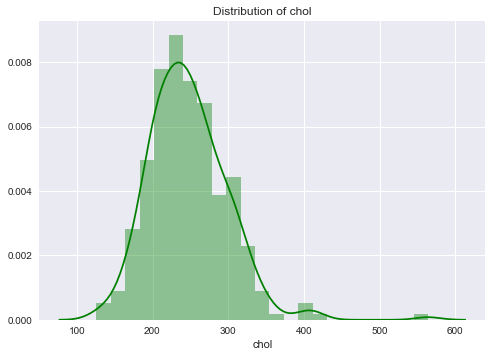

In [37]:
sns.distplot(heart_continuous['chol'], color='g')
plt.title('Distribution of chol')

In [38]:
heart[heart['chol']>500] # 이상치 확인

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
152,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0


In [39]:
heart = heart[heart['chol']<500] # 이상치 제거

Text(0.5, 1.0, 'Distribution of oldpeak')

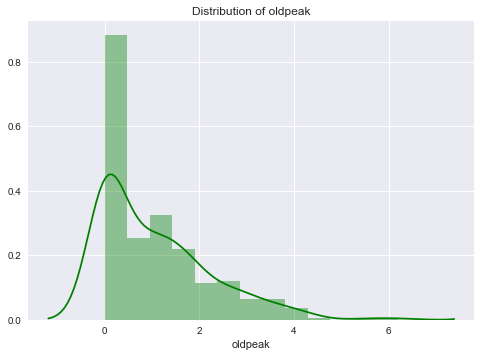

In [41]:
sns.distplot(heart_continuous['oldpeak'], color='g')
plt.title('Distribution of oldpeak')

In [42]:
heart[heart['oldpeak']>5] # 이상치 확인

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
91,62,0,4,160,164,0,2,145,0,6.2,3,3,7,1
123,55,1,4,140,217,0,0,111,1,5.6,3,0,7,1


In [43]:
heart = heart[heart['oldpeak']<5] # 이상치 제거

In [44]:
heart.reset_index(drop=True, inplace=True) # 추후 혼란을 방지하기 위해 인덱스 재정렬

In [45]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
290,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
291,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
292,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [46]:
heart.shape # 3개의 outlier를 제거함

(294, 14)

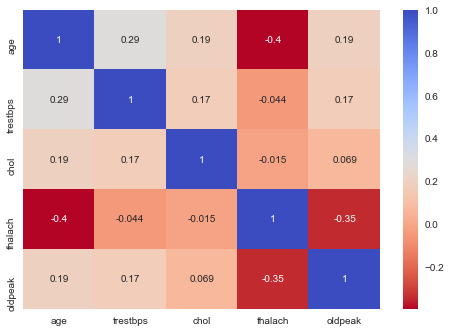

In [47]:
sns.heatmap(heart[features_continuous].corr(), annot=True, cmap='coolwarm_r')

이상치를 제거하니 변수간 correlation이 전반적으로 더 높아졌다.

### One-Hot Encoding  
  
`sex`, `cp`, `fbs`, `restecg`, `exang`, `ca`, `slop`, `thal` 변수를 One-Hot Encoding 한다. 

In [48]:
sex = pd.get_dummies(heart['sex'])
sex.columns = ['sex_female', 'sex_male']

cp = pd.get_dummies(heart['cp'], prefix='cp')

fbs = pd.get_dummies(heart['fbs'], prefix='fbs')

restecg = pd.get_dummies(heart['restecg'], prefix='restecg')

exang = pd.get_dummies(heart['exang'], prefix='exang')

ca = pd.get_dummies(heart['ca'], prefix='ca')

slop = pd.get_dummies(heart['slop'], prefix='slop')

thal = pd.get_dummies(heart['thal'])
thal.columns = ['thal_normal', 'thal_fixed defect', 'thal_reversable defect']

In [49]:
features_rest = ['age', "trestbps", "chol", "thalach", "oldpeak", 'pred_attribute']
heart_rest = heart[features_rest]
data = pd.concat([heart_rest, sex, cp, fbs, restecg, exang, ca, slop, thal], axis=1)

In [50]:
data.head()

,age,trestbps,chol,thalach,oldpeak,pred_attribute,sex_female,sex_male,cp_1,cp_2,...,ca_0,ca_1,ca_2,ca_3,slop_1,slop_2,slop_3,thal_normal,thal_fixed defect,thal_reversable defect
0,63,145,233,150,2.3,0,0,1,1,0,...,1,0,0,0,0,0,1,0,1,0
1,67,160,286,108,1.5,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,67,120,229,129,2.6,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
4,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


## Modeling

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

### 데이터 분리

In [52]:
train, test = train_test_split(data, test_size=0.2, random_state=123)

In [53]:
print(train.shape)
print(test.shape)

(235, 29)
(59, 29)


In [54]:
X = train.drop(['pred_attribute'], axis=1)
y = train['pred_attribute']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(188, 28)
(188,)
(47, 28)
(47,)


### 모델 설계

z-score normalization을 사용하였으며, 처음에는 classification model에 따로 parameter를 설정하지 않았다. (모든 parameter는 default)

In [57]:
log = make_pipeline(StandardScaler(), LogisticRegression())

nai = make_pipeline(StandardScaler(), GaussianNB())

knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

svm = make_pipeline(StandardScaler(), SVC())

rf = make_pipeline(StandardScaler(), RandomForestClassifier())

gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier())

xgb = make_pipeline(StandardScaler(), xgb.XGBClassifier())

lgb = make_pipeline(StandardScaler(), lgb.LGBMClassifier())

평가 지표는 Accuracy이다.

In [58]:
n_folds = 5
def accuracy_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  result = cross_val_score(model, X_train.values, y_train, scoring='accuracy', cv=kf)
  return result

In [59]:
score = accuracy_cv(log)
print("\nLogistic Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Logistic Regression score: 0.8566 (0.0482)



In [60]:
score = accuracy_cv(nai)
print("\nNaive Bayes score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Naive Bayes score: 0.8246 (0.0753)



In [61]:
score = accuracy_cv(knn)
print("\nKNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KNN score: 0.8671 (0.0333)



In [62]:
score = accuracy_cv(svm)
print("\nSVM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVM score: 0.8670 (0.0558)



In [63]:
score = accuracy_cv(rf)
print("\nRandomForestClassifier score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RandomForestClassifier score: 0.8615 (0.0432)



In [64]:
score = accuracy_cv(gbc)
print("\nGradientBoostingClassifier score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GradientBoostingClassifier score: 0.7977 (0.0223)



In [65]:
score = accuracy_cv(xgb)
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGBoost score: 0.8135 (0.0312)



In [66]:
score = accuracy_cv(lgb)
print("\nLightGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LightGBM score: 0.8033 (0.0206)



Accuracy는 모두 0.8 이상이다. 꽤 좋은 모델들이라고 할 수 있다.

### Base Model Tuning with Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#### Logistic Regression

In [68]:
scaler_tuple = ('scaler', StandardScaler())
model_tuple = ('log', LogisticRegression())

log2 = Pipeline([scaler_tuple, model_tuple])
log2.fit(X_train.values, y_train)

param_grid_log = {
    'log__solver' : ['lbfgs', 'liblinear'], 
    'log__C' : list(range(1,11))
}

# solver : optimization에 쓰이는 algorithm; default = lbfgs; small data엔 liblinear가 good 
# C : inverse of regularization strength; small C = strong regularization

grid_log = GridSearchCV(log2, param_grid = param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train.values, y_train)

print(grid_log.best_score_)
print(grid_log.best_params_)

0.8566145092460882
{'log__C': 1, 'log__solver': 'lbfgs'}


In [69]:
log_opt = make_pipeline(StandardScaler(), LogisticRegression(C=1, solver='lbfgs'))

#### Naive Bayes Classifier (Gaussian)  
  
딱히 조정할 parameter가 없으므로 pass

#### KNN

In [70]:
scaler_tuple = ('scaler', StandardScaler())
model_tuple = ('knn', KNeighborsClassifier())

knn2 = Pipeline([scaler_tuple, model_tuple])
knn2.fit(X_train.values, y_train)

param_grid_knn = {
    'knn__weights' : ['uniform', 'distance'],
    'knn__p' : [1,2],
    'knn__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# weights : uniform(All points are uniformly weighted); distance(거리의 역수만큼 weighted)
# p : p=1 (manhattan distance); p=2 (euclidean)
# algorithm : Algorithm used to compute the nearest neighbors

grid_knn = GridSearchCV(knn2, param_grid = param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train.values, y_train)

print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.8671408250355619
{'knn__algorithm': 'auto', 'knn__p': 2, 'knn__weights': 'uniform'}


In [71]:
knn_opt = make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm='auto', p=2, weights='uniform'))

#### SVM

In [72]:
scaler_tuple = ('scaler', StandardScaler())
model_tuple = ('svm', SVC(verbose=3))

svm2 = Pipeline([scaler_tuple, model_tuple])
svm2.fit(X_train.values, y_train)

param_grid_svm = {
    'svm__kernel' : ['linear', 'sigmoid', 'rbf'],
    'svm__gamma' : ['scale', 'auto']
}

# kernel : 사용하는 kernel trick
# gamma : scale이면 1 / (n_features * X.var()); auto면 1 / n_features

grid_svm = GridSearchCV(svm2, param_grid = param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train.values, y_train)

print(grid_svm.best_score_)
print(grid_svm.best_params_)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]0.8669985775248934
{'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [80]:
svm_opt = make_pipeline(StandardScaler(), SVC(gamma = 'scale', kernel='rbf'))

#### Random Forest

In [74]:
scaler_tuple = ('scaler', StandardScaler())
model_tuple = ('rf', RandomForestClassifier())

rf2 = Pipeline([scaler_tuple, model_tuple])
rf2.fit(X_train.values, y_train)

param_grid_rf = {
    'rf__n_estimators' : [100, 200, 300, 400, 500],
    'rf__criterion' : ['gini', 'entropy'],
    'rf__max_features' : ['auto', 'sqrt', 'log2']
}

# n_estimators : # of trees
# criterion : split의 기준을 정할 때 사용할 값
# max_features : best split을 찾을 때 사용할 feature; auto나 sqrt면 sqrt(n_features); log2면 log2(n_features) 

grid_rf = GridSearchCV(rf2, param_grid = param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train.values, y_train)

print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.8671408250355619
{'rf__criterion': 'entropy', 'rf__max_features': 'log2', 'rf__n_estimators': 100}


In [75]:
rf_opt = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, criterion='entropy' , max_features='log2'))

#### GradientBoosting

In [76]:
scaler_tuple = ('scaler', StandardScaler())
model_tuple = ('gbc', GradientBoostingClassifier())

gbc2 = Pipeline([scaler_tuple, model_tuple])
gbc2.fit(X_train.values, y_train)

param_grid_gbc = {
    'gbc__loss' : ['deviance', 'exponential'],
    'gbc__learning_rate' : [0.01, 0.05, 0.1],
    'gbc__n_estimators' : [100, 200, 300],
    'gbc__max_features' : ['auto', 'sqrt', 'log2']
}

# loss : cost function
# learning_rate : Boosting step을 반복적으로 수행할 때 업데이트 되는 학습률
# n_estimators : # of trees
# max_features : best split을 찾을 때 사용할 feature; auto나 sqrt면 sqrt(n_features); log2면 log2(n_features) 

grid_gbc = GridSearchCV(gbc2, param_grid = param_grid_gbc, cv=5, scoring='accuracy')
grid_gbc.fit(X_train.values, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('gbc',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                        

In [77]:
print(grid_gbc.best_score_)
print(grid_gbc.best_params_)

0.8719772403982929
{'gbc__learning_rate': 0.1, 'gbc__loss': 'deviance', 'gbc__max_features': 'sqrt', 'gbc__n_estimators': 200}


In [78]:
gbc_opt = make_pipeline(StandardScaler(), GradientBoostingClassifier(loss = 'deviance',learning_rate = 0.1, 
                                                                     n_estimators = 200, max_features = 'sqrt'))

#### XGBoost  
  
GradientBoosting보다 시간이 적게 걸리고, 과적합을 방지해주는 장점이 있다.

In [79]:
import xgboost as xgb

scaler_tuple = ('scaler', StandardScaler())
model_tuple = ('xgb', xgb.XGBClassifier())

xgb2 = Pipeline([scaler_tuple, model_tuple])
xgb2.fit(X_train.values, y_train)

param_grid_xgb = {
    'xgb__learning_rate' : [0.01, 0.05, 0.1],
    'xgb__n_estimators' : [100, 200, 300],
    'xgb__gamma' : [0.1, 0.2, 0.3],
    'xgb__sampling_method' : ['uniform', 'gradient_based']
}

# learning_rate : Boosting step을 반복적으로 수행할 때 업데이트 되는 학습률
# n_estimators : # of trees 
# gamma : 값이 클수록 tree depth가 줄어든다(=과적합 방지효과)
# sampling_method : sampling 방법

grid_xgb = GridSearchCV(xgb2, param_grid = param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train.values, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
              

In [81]:
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

0.8136557610241821
{'xgb__gamma': 0.2, 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 300, 'xgb__sampling_method': 'uniform'}


In [82]:
xgb_opt = make_pipeline(StandardScaler(), xgb.XGBClassifier(gamma = 0.2, learning_rate = 0.01, n_estimators=300, sampling_method='uniform'))

#### LightGBM  
  
데이터가 작으면 과적합이 발생하기 쉽지만, XGBoost에 비해 시간이 덜 걸린다.

In [83]:
import lightgbm as lgb

scaler_tuple = ('scaler', StandardScaler())
model_tuple = ('lgb', lgb.LGBMClassifier())

lgb2 = Pipeline([scaler_tuple, model_tuple])
lgb2.fit(X_train.values, y_train)

param_grid_lgb = {
    'lgb__num_leaves': [35, 50, 65],
    'lgb__n_estimators': [20, 30, 40],
    'lgb__learning_rate' : [0.01, 0.05, 0.1]
}

# num_leaves : # of leaves
# n_estimators : # of trees
# learning_rate : Boosting step을 반복적으로 수행할 때 업데이트 되는 학습률

grid_lgb = GridSearchCV(lgb2, param_grid = param_grid_lgb, cv=5, scoring='accuracy')
grid_lgb.fit(X_train.values, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lgb',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-1,
                                                       min_child_samples=20,
                                                       min_child_weight=0.001,
      

In [84]:
print(grid_lgb.best_score_)
print(grid_lgb.best_params_)

0.8354196301564724
{'lgb__learning_rate': 0.1, 'lgb__n_estimators': 30, 'lgb__num_leaves': 35}


In [92]:
lgb_opt = make_pipeline(StandardScaler(), lgb.LGBMClassifier(learning_rate = 0.1, n_estimators=30, num_leaves=35))

* Optimization 결과 SVM, RandomForest, GradientBoosting, XGBoost, LightGBM의 Accuracy가 대폭 상승했다.  
* 모델 성능 순으로 적어보자면,  
GradientBoosting - RandomForest & KNN - SVM -  Logistic - LightGBM - Naive Bayes - XGBoost 순으로 성능이 좋다.

## CV 기반 Stacking

### `sklearn.ensemble` 라이브러리 사용

In [85]:
from sklearn.ensemble import StackingClassifier

성능이 좋은 편에 속하는 model들을 base model로 두고 meta model은 과적합을 방지해주는 장점이 있는 XGBoost를 사용했다.

In [93]:
# 파라미터 설정

# estimators : Base Models
# final_estimator : Meta Model
# cv : cross validation 횟수; default=5; Stratified K-folds
# verbose : verbosity (값이 클수록 자세한 설명)

estimators = [
              ('knn',knn_opt),
              ('svm',svm_opt),
              ('rf',rf_opt)
]
              
# Stacking
reg = StackingClassifier(
    estimators = estimators,
    final_estimator = lgb_opt,
    cv = 10,
    n_jobs=3,
    verbose=3
    )

# fit
reg.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('knn',
                                Pipeline(memory=None,
                                         steps=[('standardscaler',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(algorithm='auto',
                                                                      leaf_size=30,
                                                                      metric='minkowski',
                                                                      metric_params=None,
                                                                      n_jobs=None,
                                                                      

In [94]:
accuracy_score(y_test, reg.predict(X_test))

0.7446808510638298

위 결과는 여러 가지 모델을 조합해봤을 때 가장 accuracy가 높은 결과이다.  
그럼에도 불구하고 Stacking을 했더니 성능이 저하되었다. ㅠㅠ 

### `sklearn.ensemble.StackingClassifier` 코드 구현
  
https://heung-bae-lee.github.io/2020/05/27/machine_learning_16/ 참고하였습니다.

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFold 생성
    kf=KFold(n_splits=n_folds, shuffle=True, random_state=0)
    # 추후에 meta model이 사용할 학습 데이터 반환을 위한 numpy array 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트:', folder_counter, '시작')
        X_tr = X_train_n.values[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n.values[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)

        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :]=model.predict(X_te).reshape(-1,1)

        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [98]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [99]:
knn_train, knn_test = get_stacking_base_datasets(knn_opt, X_train, y_train, X_test, 3)
rf_train, rf_test = get_stacking_base_datasets(rf_opt, X_train, y_train, X_test, 3)
svm_train, svm_test = get_stacking_base_datasets(svm_opt, X_train, y_train, X_test, 3)

Pipeline model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
Pipeline model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
Pipeline model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작


In [100]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, svm_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, svm_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape, '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (188, 28) 원본 테스트 피처 Shape: (47, 28)
스태킹 학습 피처 데이터 Shape: (188, 3) 스태킹 테스트 피처 데이터 Shape: (47, 3)


In [101]:
lgb_opt.fit(Stack_final_X_train, y_train)
stack_final = lgb_opt.predict(Stack_final_X_test)
print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도:0.7447


## Insight

* stack 후에 왜 accuracy가 감소했을까? → 과적합의 가능성이 있다고 본다.